In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [8]:
df = pd.read_csv('Mall_Customers.csv')  # replace with your actual file path
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
df.shape

(200, 6)

In [38]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
 5   Cluster                 200 non-null    int32
dtypes: int32(1), int64(5)
memory usage: 8.7 KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Cluster                   0
dtype: int64

In [39]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


In [66]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)','Age']]
X

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31
...,...,...,...
195,120,79,35
196,126,28,45
197,126,74,32
198,137,18,32


In [67]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)


In [68]:
scaled_X

array([[-1.73899919, -0.43480148, -1.42456879],
       [-1.73899919,  1.19570407, -1.28103541],
       [-1.70082976, -1.71591298, -1.3528021 ],
       [-1.70082976,  1.04041783, -1.13750203],
       [-1.66266033, -0.39597992, -0.56336851],
       [-1.66266033,  1.00159627, -1.20926872],
       [-1.62449091, -1.71591298, -0.27630176],
       [-1.62449091,  1.70038436, -1.13750203],
       [-1.58632148, -1.83237767,  1.80493225],
       [-1.58632148,  0.84631002, -0.6351352 ],
       [-1.58632148, -1.4053405 ,  2.02023231],
       [-1.58632148,  1.89449216, -0.27630176],
       [-1.54815205, -1.36651894,  1.37433211],
       [-1.54815205,  1.04041783, -1.06573534],
       [-1.54815205, -1.44416206, -0.13276838],
       [-1.54815205,  1.11806095, -1.20926872],
       [-1.50998262, -0.59008772, -0.27630176],
       [-1.50998262,  0.61338066, -1.3528021 ],
       [-1.43364376, -0.82301709,  0.94373197],
       [-1.43364376,  1.8556706 , -0.27630176],
       [-1.39547433, -0.59008772, -0.276

In [69]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_X)


pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df

,PC1,PC2
0,-0.615720,-1.763481
1,-1.665793,-1.820747
2,0.337862,-1.674799
3,-1.456573,-1.772430
4,-0.038465,-1.662740
...,...,...
195,-1.093705,2.215577
196,0.800448,2.540748
197,-1.119709,2.445169
198,0.395411,2.946665


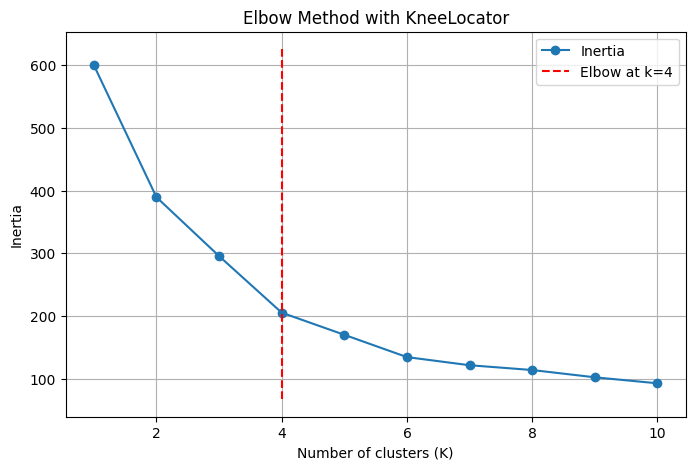

Optimal number of clusters: 4


In [70]:

from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_X)
    inertia.append(kmeans.inertia_)

# Use KneeLocator to find the elbow
knee = KneeLocator(K_range, inertia, curve='convex', direction='decreasing')
optimal_k = knee.knee

# Plot Elbow Graph with knee point marked
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', label='Inertia')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='--', colors='red', label=f'Elbow at k={optimal_k}')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method with KneeLocator')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal number of clusters: {optimal_k}")


In [71]:

kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_X)

df['Cluster'] = cluster_labels

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_X)

pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels


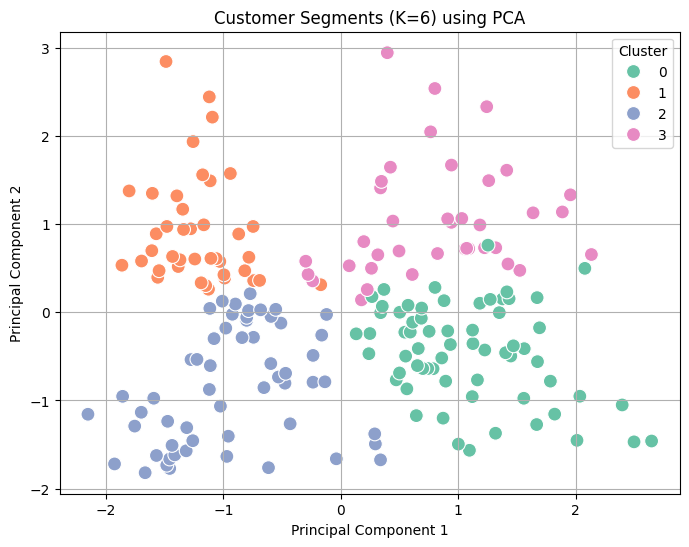

In [73]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments (K=6) using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [75]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_X, cluster_labels)
print(f"Silhouette Score for K=6: {score:.3f}")


Silhouette Score for K=6: 0.404


In [76]:
cluster_profile = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_profile)


         CustomerID  Gender        Age  Annual Income (k$)  \
Cluster                                                      
0         69.415385     NaN  53.984615           47.707692   
1        161.025000     NaN  32.875000           86.100000   
2         53.438596     NaN  25.438596           40.000000   
3        160.552632     NaN  39.368421           86.500000   

         Spending Score (1-100)  
Cluster                          
0                     39.969231  
1                     81.525000  
2                     60.298246  
3                     19.578947  


In [77]:
df.groupby('Cluster').mean(numeric_only=True)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,69.415385,NaN,53.984615,47.707692,39.969231
1,161.025000,NaN,32.875000,86.100000,81.525000
2,53.438596,NaN,25.438596,40.000000,60.298246
3,160.552632,NaN,39.368421,86.500000,19.578947


In [78]:
cluster_names = {
    0: "Average Shoppers",
    1: "Premium Spenders",
    2: "Young Value Seekers",     # low income, but high spend
    3: "Cautious Rich",           # high income, but low spend
    4: "Low Budget Shoppers"      # low income, low spend
}


In [81]:
new_data = [[70, 90,25]]  # Income = 70k, Spend Score = 90
scaled = scaler.transform(new_data)
cluster = kmeans.predict(scaled)
print("Predicted Segment:", cluster_names[cluster[0]])


Predicted Segment: Premium Spenders


e:\harsimran\Elevate labs\task_8\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [82]:
df['Segment'] = df['Cluster'].map(cluster_names)
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Segment
0,1,NaN,19,15,39,2,Young Value Seekers
1,2,NaN,21,15,81,2,Young Value Seekers
2,3,NaN,20,16,6,2,Young Value Seekers
3,4,NaN,23,16,77,2,Young Value Seekers
4,5,NaN,31,17,40,2,Young Value Seekers


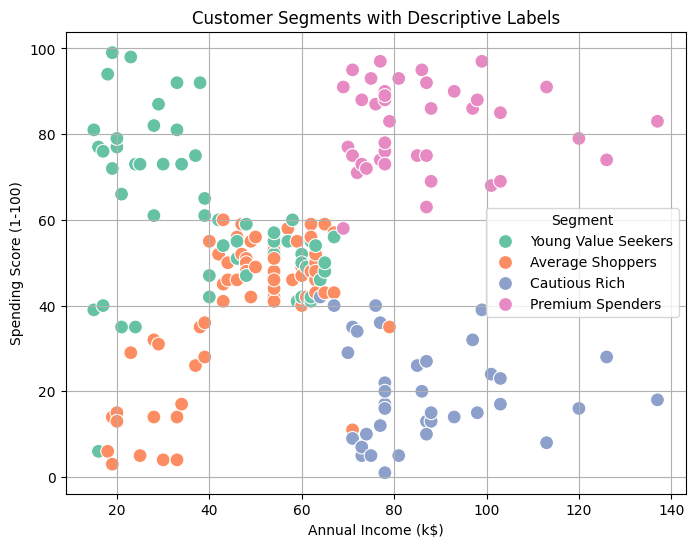

In [83]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Segment', palette='Set2', s=100)
plt.title("Customer Segments with Descriptive Labels")
plt.grid(True)
plt.show()
